<a href="https://colab.research.google.com/github/lokesharma-dev/Fake-News-Detection/blob/master/gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving datasets.py to datasets.py


{'datasets.py': b'import numpy as np\n\n\nclass MNISTDataset:\n    """\'Bare minimum\' class to wrap MNIST numpy arrays into a dataset."""\n    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,\n                 to01=True, shuffle=True, seed=None):\n        """\n        Use seed optionally to always get the same shuffling (-> reproducible\n        results).\n        """\n        self.batch_size = batch_size\n        self.train_data = train_imgs\n        self.train_labels = train_lbs.astype(np.int32)\n        self.test_data = test_imgs\n        self.test_labels = test_lbls.astype(np.int32)\n\n        if to01:\n            # int in [0, 255] -> float in [0, 1]\n            self.train_data = self.train_data.astype(np.float32) / 255\n            self.test_data = self.test_data.astype(np.float32) / 255\n\n        self.size = self.train_data.shape[0]\n\n        if seed:\n            np.random.seed(seed)\n        if shuffle:\n            self.shuffle_train()\n        

In [6]:
tf.__version__

'2.2.0-rc4'

In [0]:
from datasets import MNISTDataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

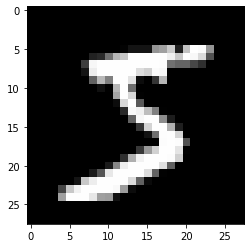

In [12]:
plt.imshow(train_images[0], cmap='Greys_r')

In [13]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Reshape train and test datasets

In [0]:
mnist_data = MNISTDataset(train_images.reshape([-1,784]),train_labels,
                          test_images.reshape([-1,784]), test_labels,
                          batch_size=64)

## 1 Hidden Layer
Initialize parameters and hyperparameters

In [0]:
input_units, hidden_units, output_units = 784, 128, 10
train_steps, learning_rate = 2000, 0.1
# Hidden layer parameters
w1 = tf.Variable(tf.random.uniform([hidden_units,input_units], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b1 = tf.Variable(tf.zeros([hidden_units]))
# Output layer parameters
w2 = tf.Variable(tf.random.uniform([output_units,hidden_units], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b2 = tf.Variable(tf.zeros([output_units]))

In [0]:
def compute_logits(x):
  act1 = tf.nn.relu(tf.matmul(x, tf.transpose(w1)) + b1)
  logits = tf.matmul(act1, tf.transpose(w2)) + b2
  return logits

In [67]:
accuracy_list = []
loss_list = []
step_list = []
for step in range(train_steps):
  img_batch, lbl_batch = mnist_data.next_batch()
  with tf.GradientTape() as tape:
    logits = compute_logits(img_batch)
    loss_output = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))

    # Calculate Gradient
    grads = tape.gradient(loss_output, [w1,b1,w2,b2])
    # layer 1
    w1.assign_sub(learning_rate*grads[0])
    b1.assign_sub(learning_rate*grads[1])
    # Output layer
    w2.assign_sub(learning_rate*grads[2])
    b2.assign_sub(learning_rate*grads[3])

    if not step % 100:
      train_preds = tf.argmax(logits, axis=1, output_type=tf.int32)
      train_acc = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
      print('Loss : {}, Accuracy : {}'.format(loss_output, train_acc))
      accuracy_list.append(train_acc)
      loss_list.append(loss_output)
      step_list.append(step)

Loss : 2.3372936248779297, Accuracy : 0.171875
Loss : 0.5986837148666382, Accuracy : 0.8125
Loss : 0.40651530027389526, Accuracy : 0.875
Loss : 0.29791995882987976, Accuracy : 0.921875
Loss : 0.3940253257751465, Accuracy : 0.90625
Loss : 0.21839162707328796, Accuracy : 0.921875
Starting new epoch...
Loss : 0.24395504593849182, Accuracy : 0.90625
Loss : 0.17079174518585205, Accuracy : 0.9375
Loss : 0.32171082496643066, Accuracy : 0.9375
Loss : 0.15333500504493713, Accuracy : 0.96875
Loss : 0.5276774168014526, Accuracy : 0.875
Loss : 0.43804365396499634, Accuracy : 0.875
Loss : 0.2878183126449585, Accuracy : 0.9375
Loss : 0.2354307472705841, Accuracy : 0.9375
Loss : 0.20787465572357178, Accuracy : 0.921875
Starting new epoch...
Loss : 0.1768127977848053, Accuracy : 0.953125
Loss : 0.1813296526670456, Accuracy : 0.921875
Loss : 0.07319587469100952, Accuracy : 0.984375
Loss : 0.19175931811332703, Accuracy : 0.921875
Loss : 0.13851696252822876, Accuracy : 0.96875


# Plot Metrics

Text(0.5, 1.0, 'Training loss Vs Stepsize')

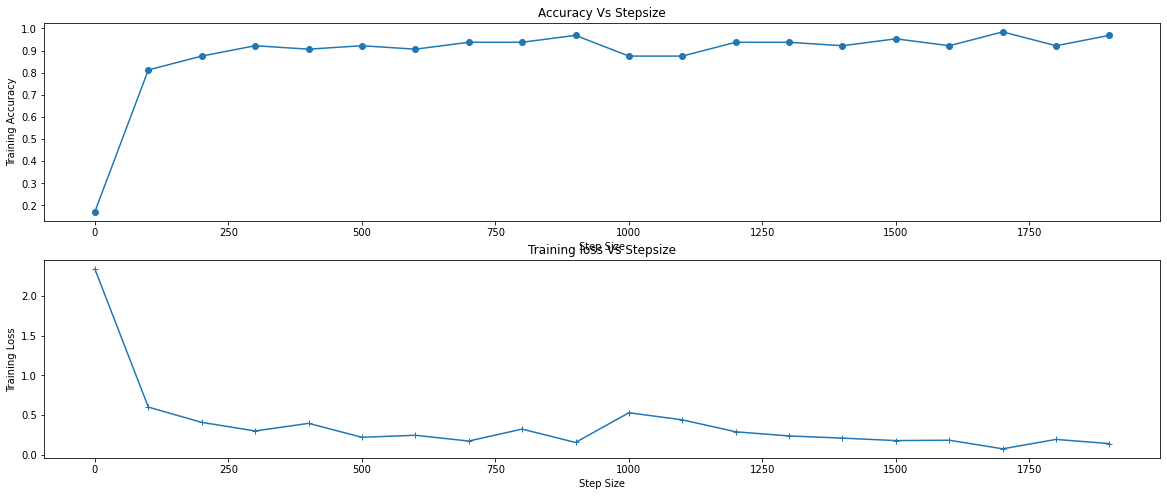

In [69]:
plt.figure(figsize = (20,8))
plt.subplot(2,1,1)
plt.plot(step_list,accuracy_list,'o-')
plt.ylabel('Training Accuracy')
plt.xlabel('Step Size')
plt.title('Accuracy Vs Stepsize')

plt.subplot(2,1,2)
plt.plot(step_list, loss_list, '+-')
plt.xlabel('Step Size')
plt.ylabel('Training Loss')
plt.title('Training loss Vs Stepsize')